# Regression

## Data Viewer and Basic Summary

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [37]:
import pandas as pd

data = pd.DataFrame(california['data'], columns=california['feature_names'])

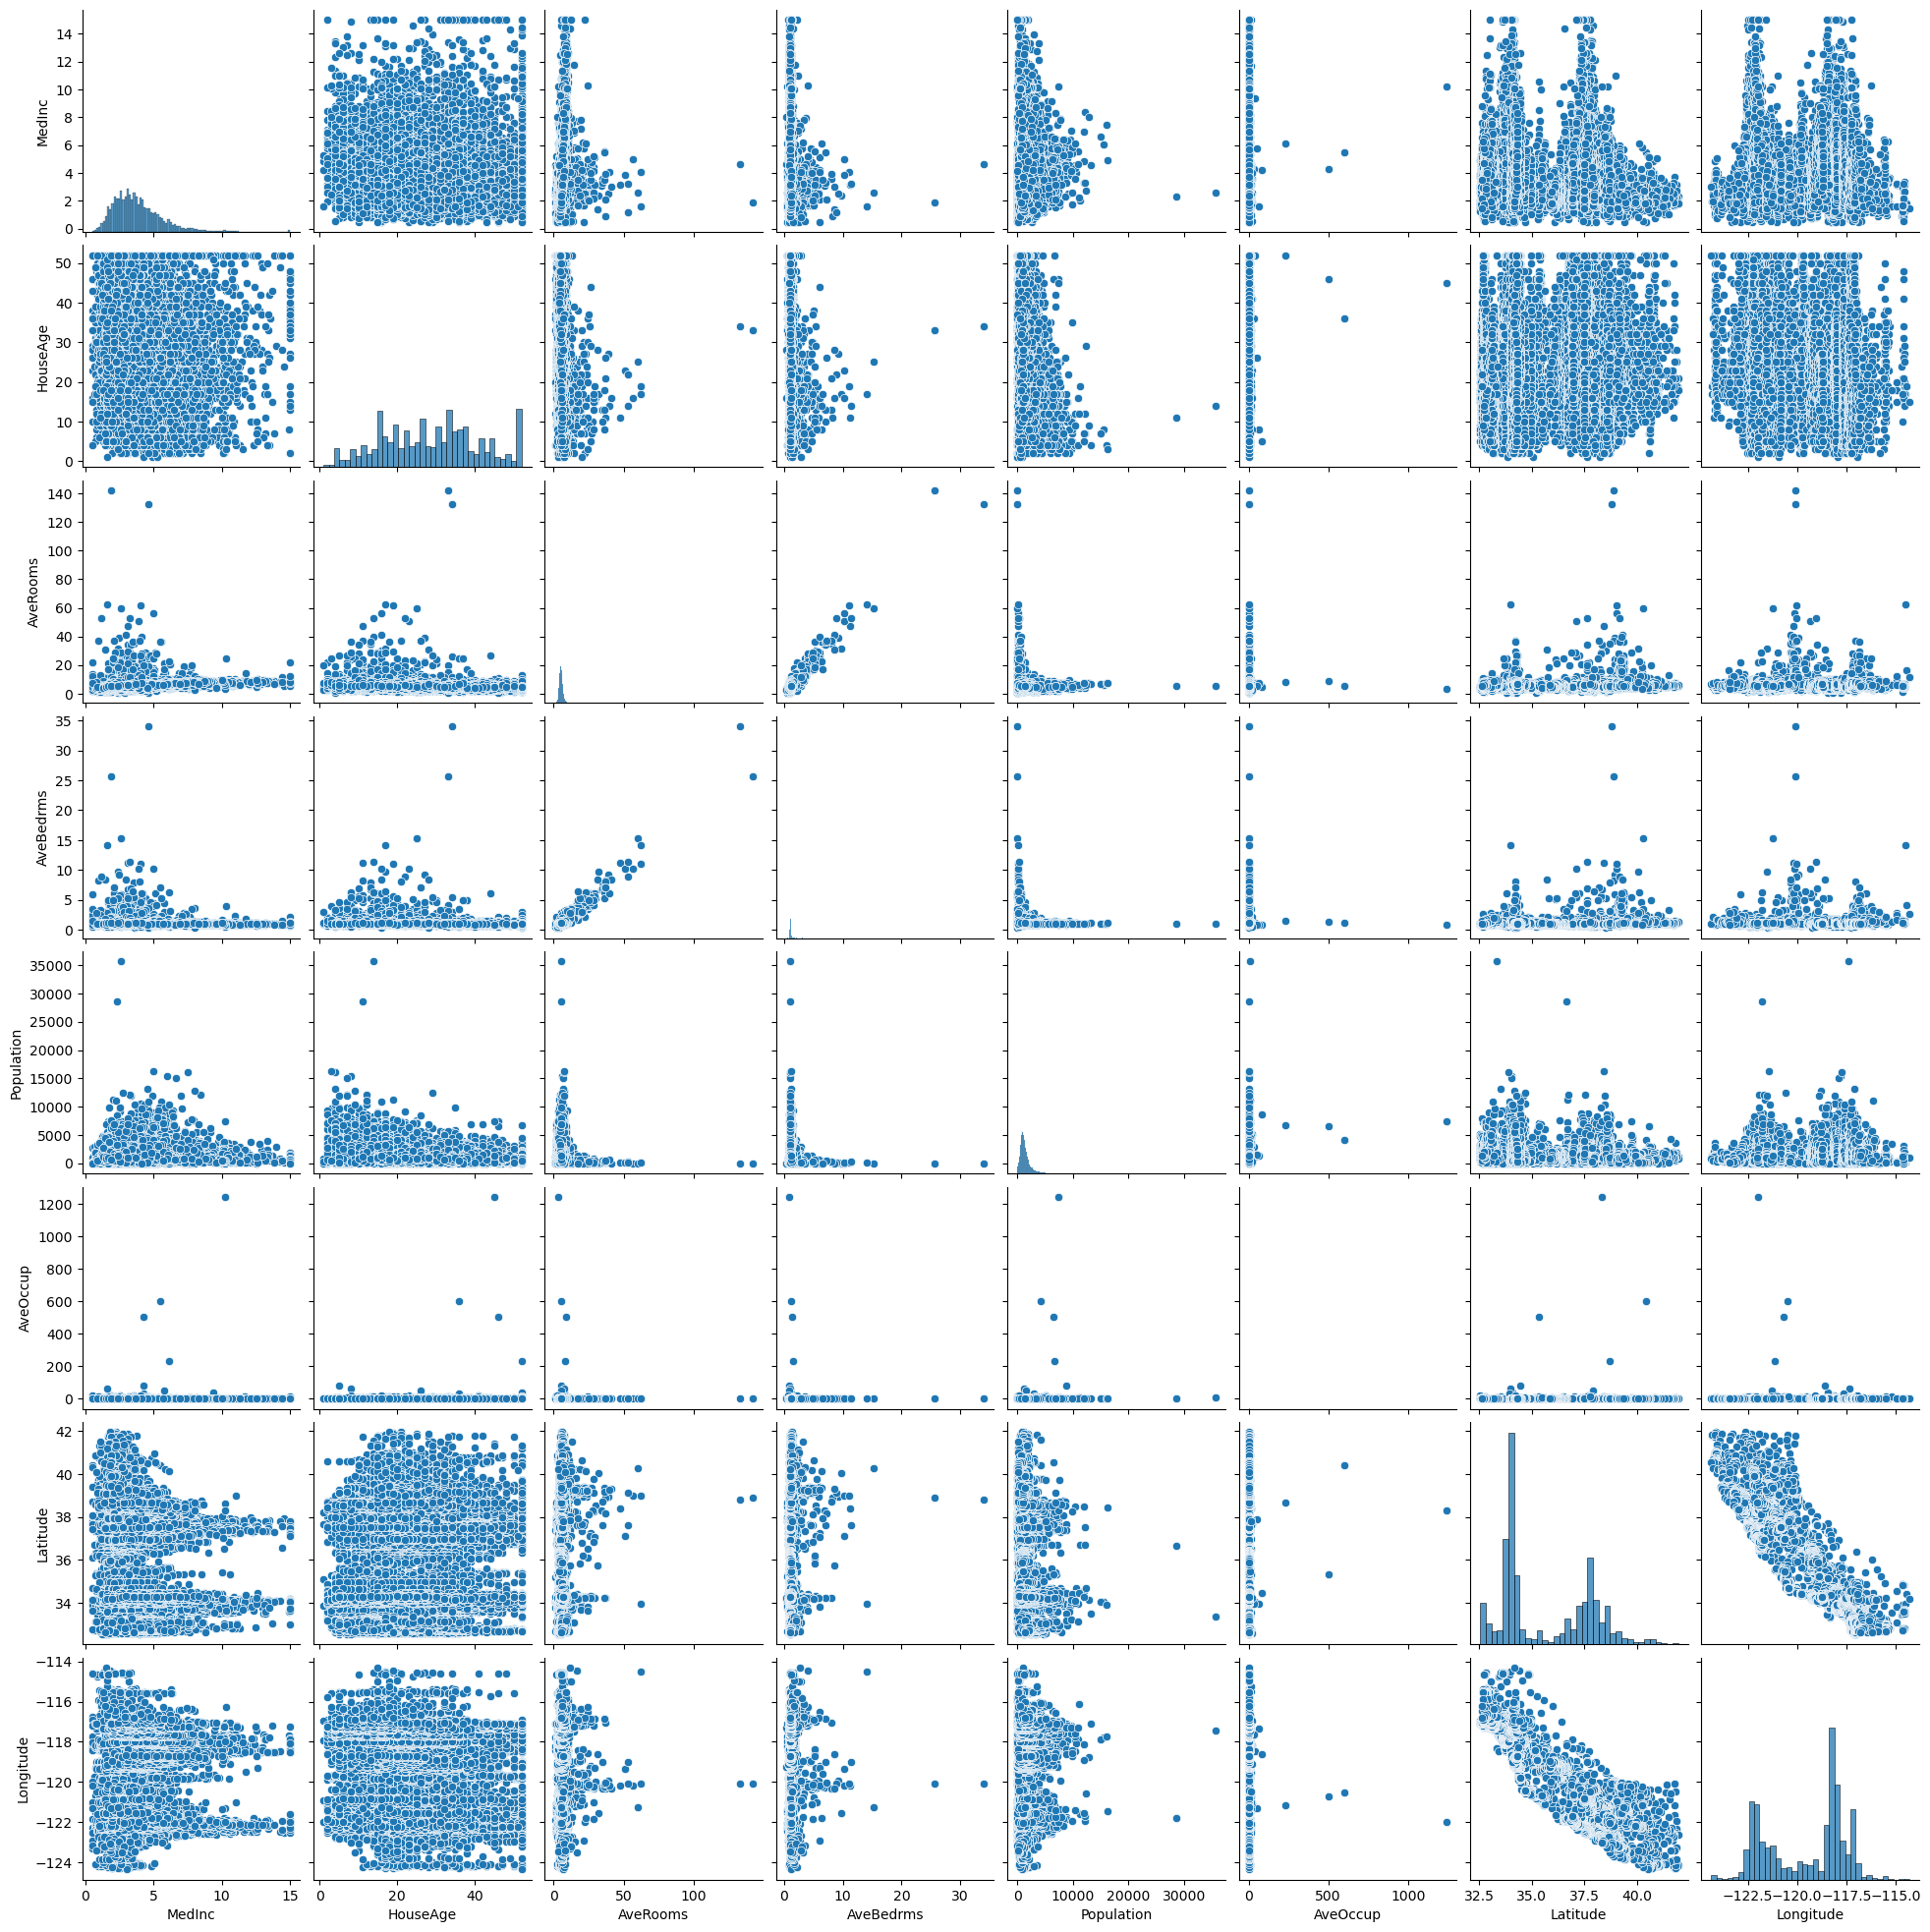

In [7]:
import seaborn as sns
sns.pairplot(data)

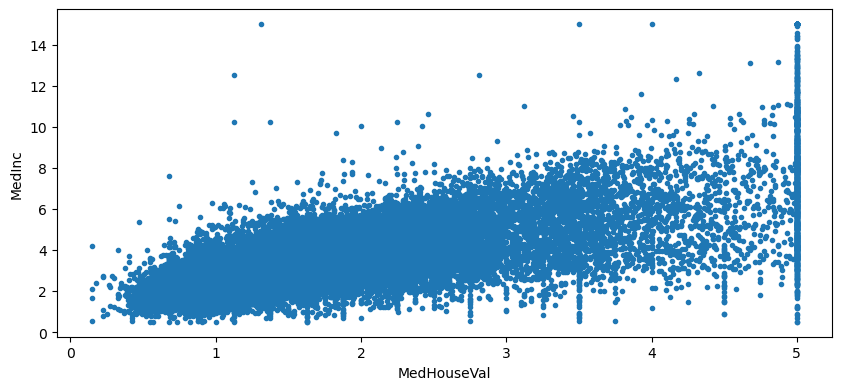

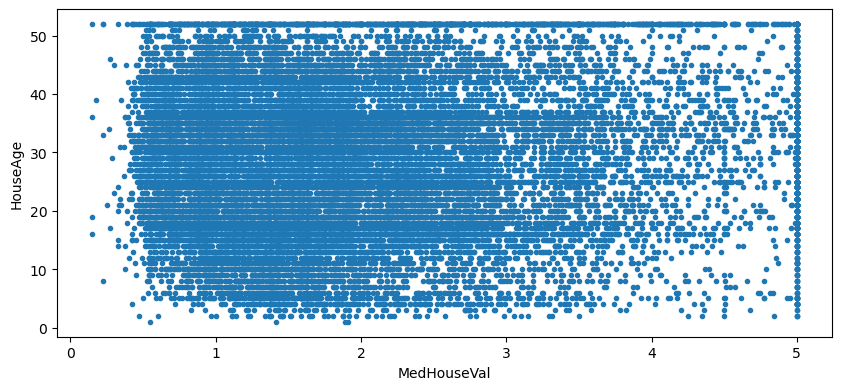

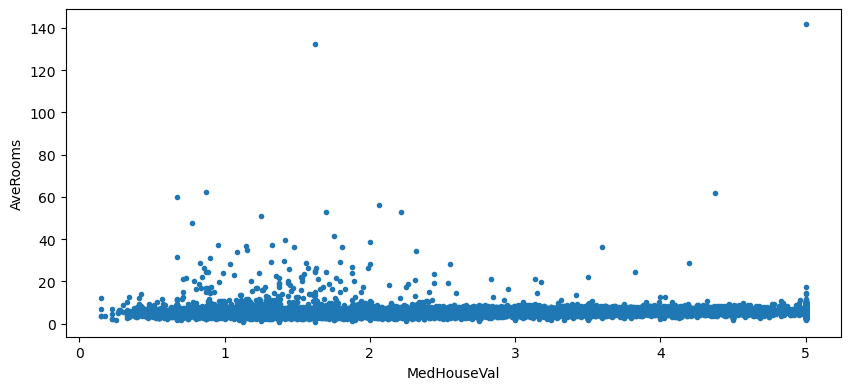

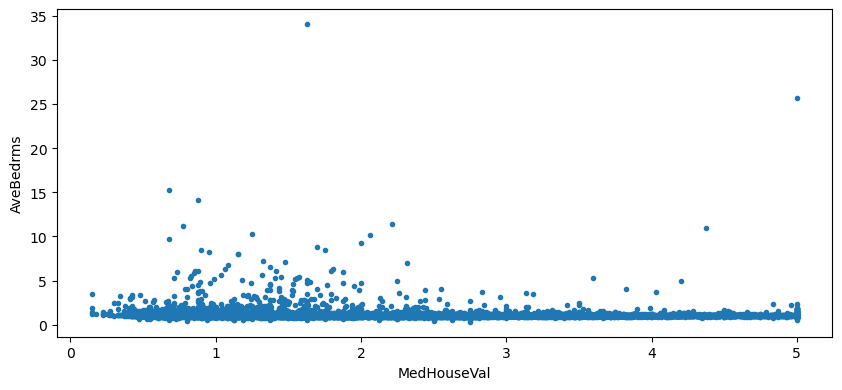

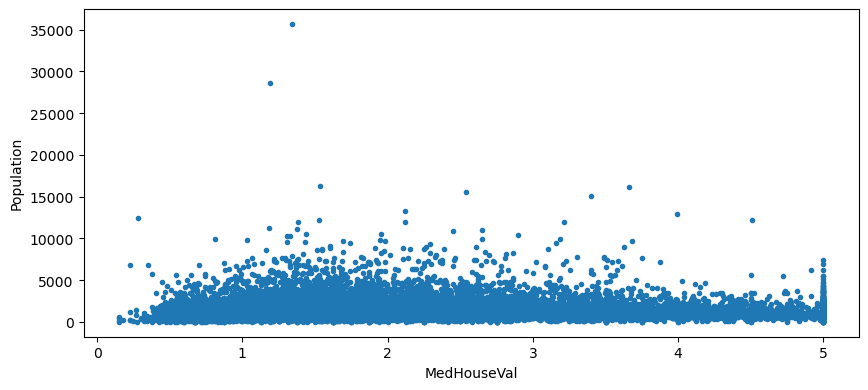

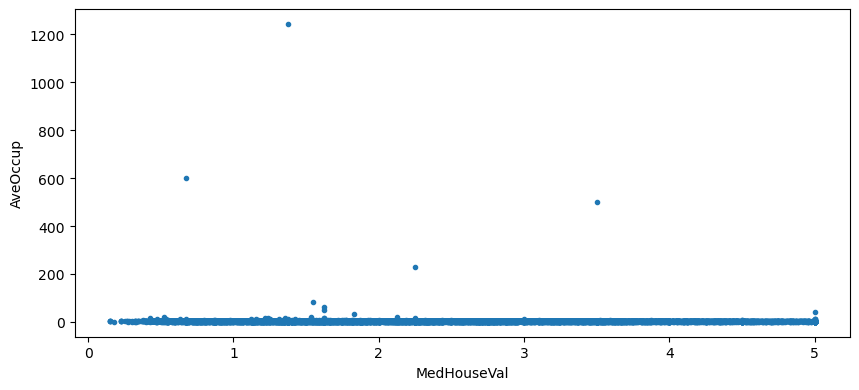

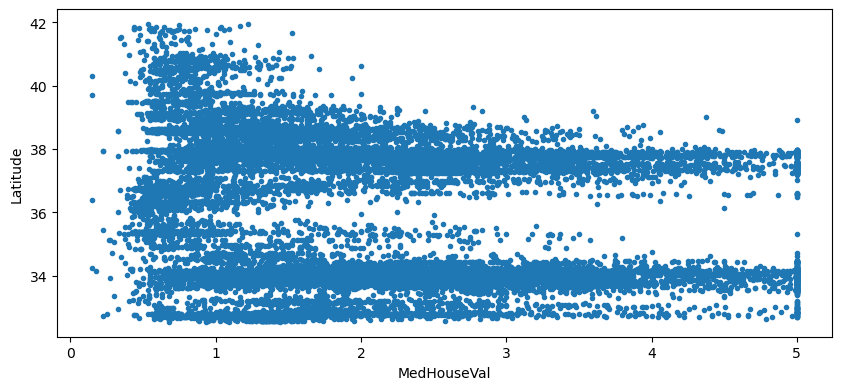

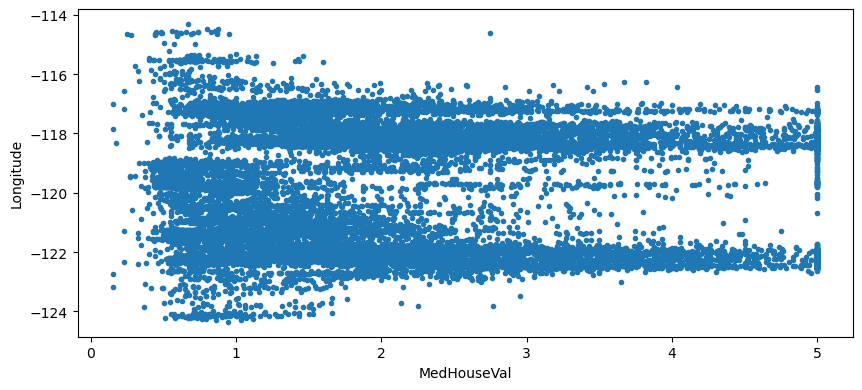

In [13]:
import matplotlib.pyplot as plt
for i in range(1, len(california['feature_names']) + 1):
    plt.figure(figsize=(10,40))
    plt.subplot(8,1,i)
    plt.plot(california['target'],data.iloc[:,i-1],'.')
    plt.xlabel(california['target_names'][0])
    plt.ylabel(california['feature_names'][i-1])

## Model

In [38]:
import sklearn.model_selection as ms
X_train, X_test, Y_train, Y_test = ms.train_test_split(data, california['target'], random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
r2_lm = lm.score(X_test, Y_test)
r2_lm # Compute R_square

0.5929869285760099

In [40]:
# Clear the outlier
import numpy as np

data['target'] = california['target']

index = np.where(data['AveOccup'] > 200) 
data = data.drop(index=index[0])  # 或者在drop 里加inplace也能达到修改的效果

index = np.where(data['Population'] > 15000)
data = data.drop(index=index[0])

index = np.where(data['AveBedrms'] > 15)
data = data.drop(index=index[0])

index = np.where(data['AveRooms'] > 60)
data = data.drop(index=index[0])

# # Another way to do this
# data_new = pd.DataFrame()
# data_new = data[(data['AveOccup'] < 200) & (data['Population'] < 15000) & (data['AveBedrms'] < 15) & (data['AveRooms'] < 60)]
## 一定要加括号


In [33]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [30]:
data.quantile(q=[0.25, 0.75])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0.25,2.5637,18.0,4.440620,1.006061,787.0,2.429304,33.93,-121.80
0.75,4.7426,37.0,6.051724,1.099490,1724.0,3.282051,37.71,-118.01


In [41]:
# Continue to train

import sklearn.model_selection as ms
X_train, X_test, Y_train, Y_test = ms.train_test_split(data.iloc[:,:8], data.iloc[:,8],random_state=1)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
r2_lm = lm.score(X_test, Y_test)
r2_lm

0.6136817435527077

In [36]:
# 一些量的获取
lm.coef_
lm.intercept_
lm_df = pd.DataFrame(list(zip(data.columns, lm.coef_)), columns=['cloumns', 'coef'])
lm_df

array([ 4.37697331e-01,  9.89804771e-03, -1.15987146e-01,  7.13563803e-01,
        1.93775744e-05, -1.43649947e-01, -4.23882725e-01, -4.28951905e-01])

<Axes: >

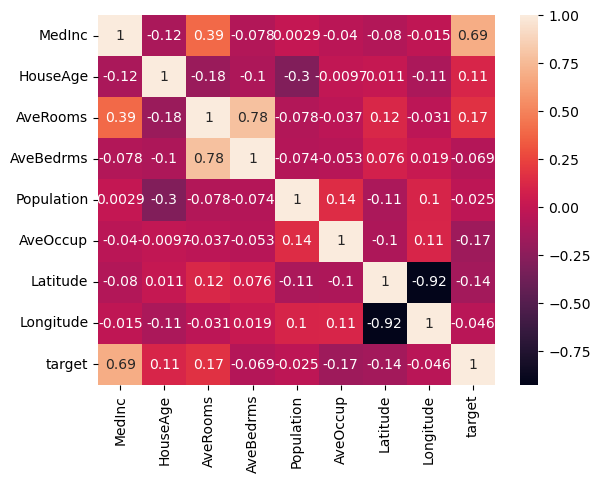

In [44]:
import seaborn as sns
## Change Size
sns.heatmap(data.corr(), annot= True)

In [43]:
from sklearn.linear_model import Ridge
lr = Ridge()
lr.fit(X_train, Y_train)
r2_lr = lr.score(X_test, Y_test)
r2_lr



0.6136892416411937

In [49]:
# Cross-Validation to find a proper alpha
from sklearn.linear_model import RidgeCV
import numpy as np

lr_cv = RidgeCV(store_cv_values=True).fit(X_train, Y_train)


(15468, 3)

In [51]:
alpha_set = np.logspace(-20, 20, 400)
coef = pd.DataFrame(columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8'])
i = 0
for alpha in alpha_set:
    ridge_clf = Ridge(alpha=alpha)
    ridge_clf.fit(X_train, Y_train)
    coef.loc[i] = ridge_clf.coef_
    i = i + 1

<Axes: >

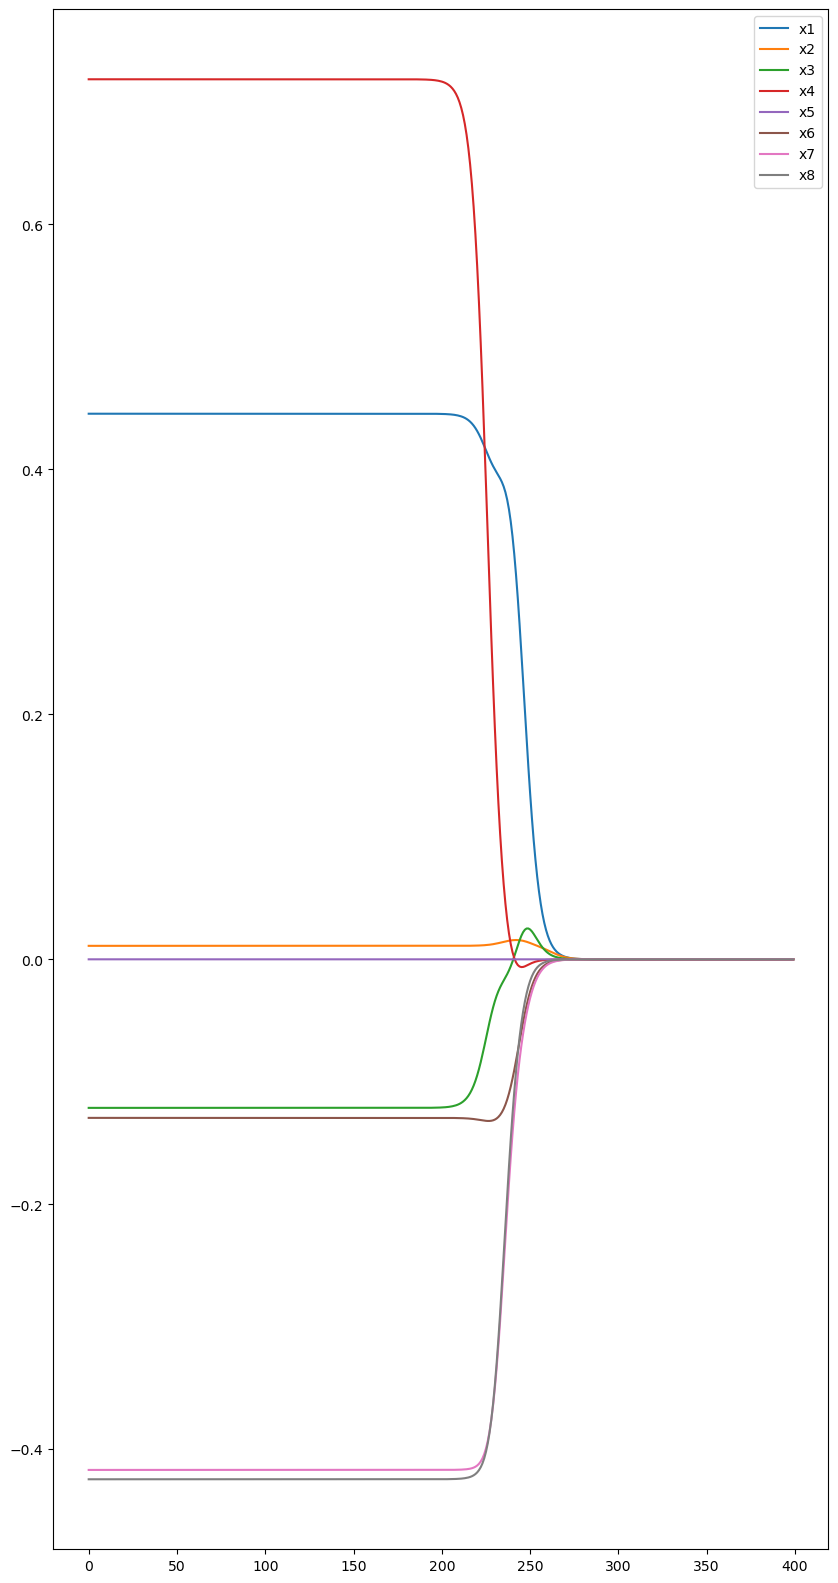

In [52]:
coef.plot(figsize=(10,20))